# check

## import and basic info

In [1]:
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [71]:
df = pd.read_csv("user_behavior_dataset.csv")
print(df.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [3]:
print(df.describe())

         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min      

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


## simple check

In [5]:
dmcounts = df['Device Model'].value_counts()
print(dmcounts)

Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: Device Model, dtype: int64


In [6]:
oscounts = df['Operating System'].value_counts()
print(oscounts)
## yeah, iphone vs others of course what am I thinking

Android    554
iOS        146
Name: Operating System, dtype: int64


In [7]:
gendercounts = df['Gender'].value_counts()
print(gendercounts)
## total 700

Male      364
Female    336
Name: Gender, dtype: int64


## further check

In [8]:
tdfa = df['Device Model'].value_counts()
tdfa

Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: Device Model, dtype: int64

                index  Device Model
0        Xiaomi Mi 11           146
1           iPhone 12           146
2      Google Pixel 5           142
3           OnePlus 9           133
4  Samsung Galaxy S21           133


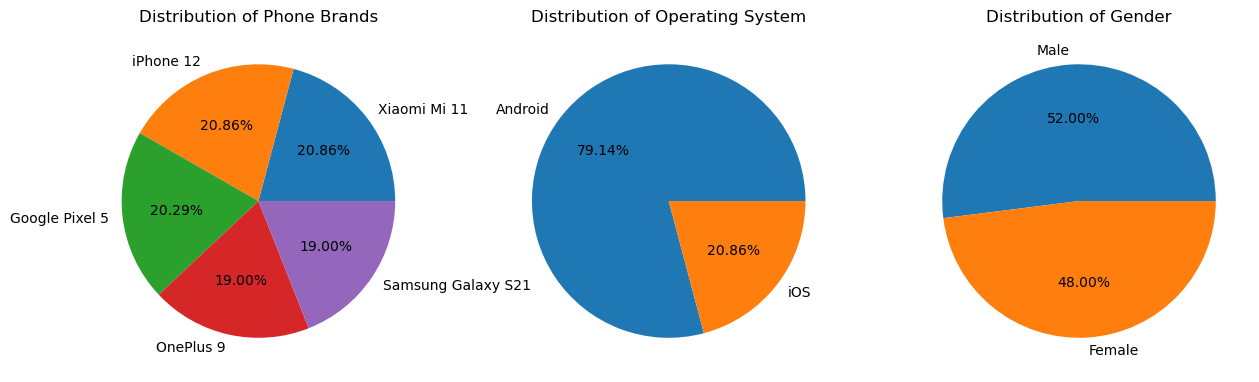

In [ ]:
tdf = df['Device Model'].value_counts().reset_index()
# .value_counts 算出每个unique出現的次數，reset_index 新增一行普通的從0開始的索引，並把本來的索引(5種手機)變成跟算出來的次數一樣的東西(column/內容)，這樣就有兩種內容可以畫圖了
print(tdf)
tdf.columns = ['Device Model', 'count']
tdf1 = df['Operating System'].value_counts().reset_index()
tdf1.columns = ['Operating System', 'count']
tdf2 = df['Gender'].value_counts().reset_index()
tdf2.columns = ['Gender', 'count']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].pie(x=tdf['count'], labels=tdf['Device Model'], autopct='%.2f%%')
ax[0].set_title("Distribution of Phone Brands")
ax[1].pie(x=tdf1['count'], labels=tdf1['Operating System'], autopct='%.2f%%')
ax[1].set_title("Distribution of Operating System")
ax[2].pie(x=tdf2['count'], labels=tdf2['Gender'], autopct='%.2f%%')
ax[2].set_title("Distribution of Gender")

plt.show()

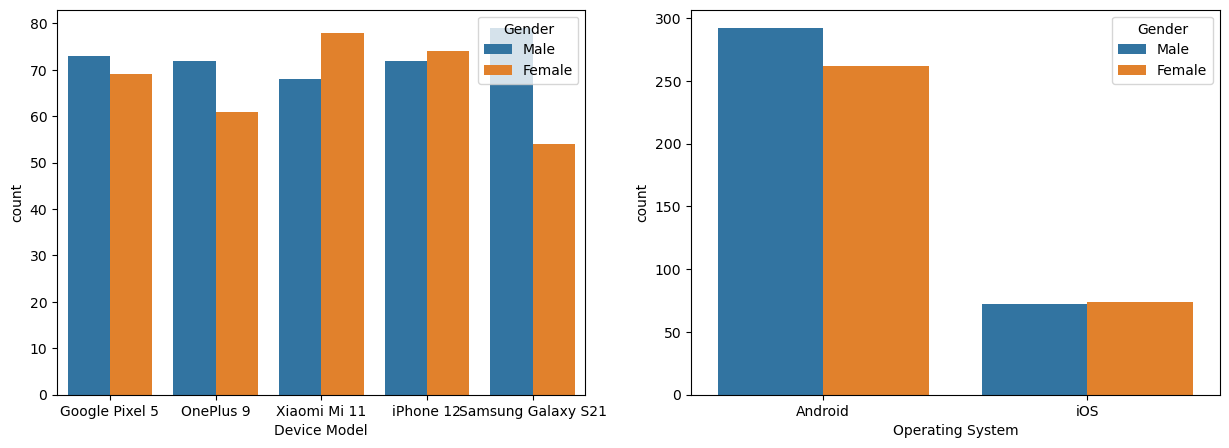

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df,x='Device Model',hue='Gender',ax=ax[0])
sns.countplot(data=df,x='Operating System',hue='Gender',ax=ax[1])
plt.show()
# m = Pixel 5, OP9, Samsung S21, f = XM11, iPhone 12
# android m > f

38.95890410958904
38.35740072202166


<Figure size 1000x600 with 0 Axes>

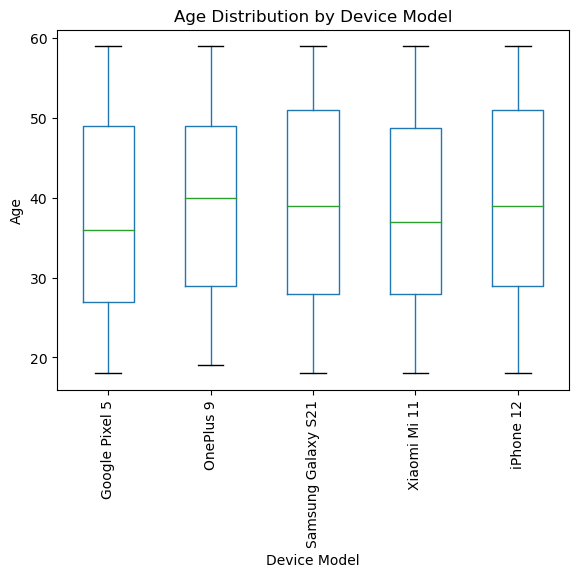

37.767605633802816


In [11]:
i_age = df[df['Device Model'] == 'iPhone 12']['Age']
avg_i_age = i_age.mean()
print(avg_i_age)
android_age = df[df['Operating System'] == 'Android']['Age']
avg_android_age = android_age.mean()
print(avg_android_age)
#確實沒差

plt.figure(figsize=(10, 6))
df.boxplot(column='Age', by='Device Model', grid=False, rot=90)
plt.title('Age Distribution by Device Model')
plt.suptitle('')
plt.xlabel('Device Model')
plt.ylabel('Age')
plt.show()
#分布影響不大

google_age = df[df['Device Model'] == 'Google Pixel 5']['Age']
avg_google_age = google_age.mean()
print(avg_google_age)
#GP5 平均年齡稍小

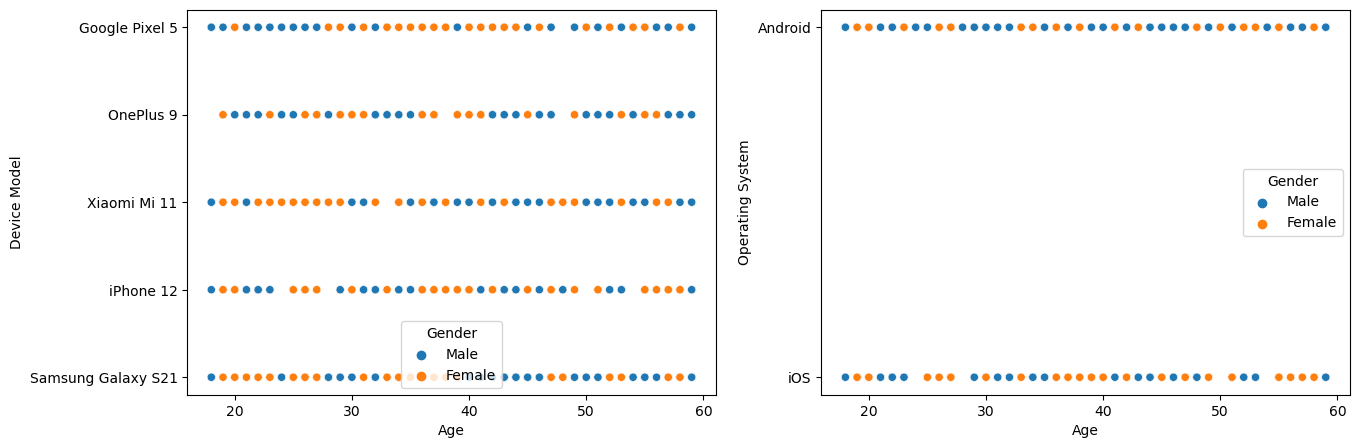

In [12]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df, y='Device Model', x='Age', hue='Gender', ax=ax[0])
sns.scatterplot(data=df, y='Operating System', x='Age', hue='Gender', ax=ax[1])
plt.show()
# 看不出東西

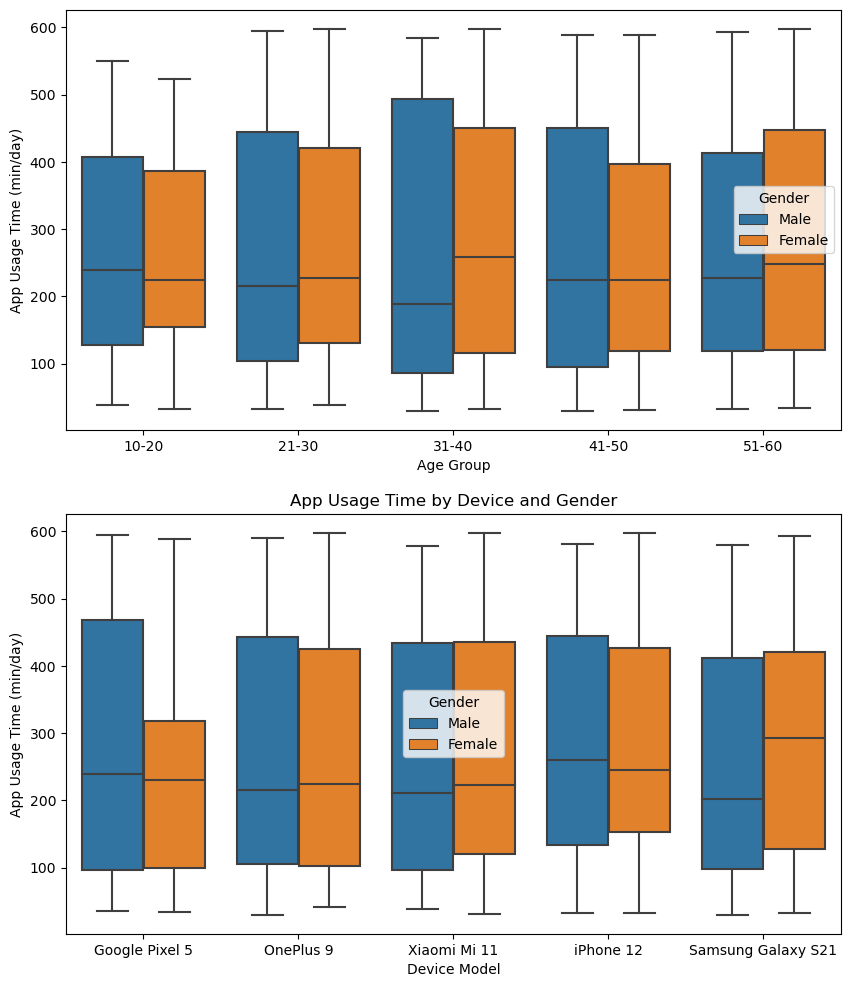

21-30    178
31-40    168
51-60    159
41-50    155
10-20     40
Name: Age Group, dtype: int64


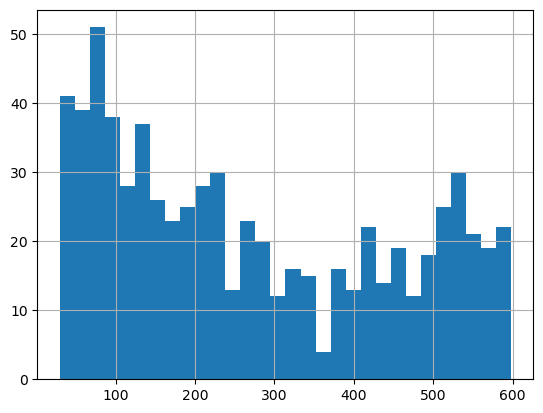

271.12857142857143
Gender                  Female        Male
Device Model                              
Google Pixel 5      252.695652  282.054795
OnePlus 9           265.918033  274.166667
Samsung Galaxy S21  290.074074  250.253165
Xiaomi Mi 11        267.974359  269.000000
iPhone 12           285.918919  278.013889

 79 73


In [82]:
df['Age Group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60], labels=['10-20', '21-30', '31-40', '41-50', '51-60'])
fig,ax=plt.subplots(2,1, figsize=(10,12))

sns.boxplot(x='Age Group', y='App Usage Time (min/day)', hue='Gender', data=df, ax=ax[0])
plt.title('App Usage Time by Age Group and Gender')
sns.boxplot(x='Device Model', y='App Usage Time (min/day)', hue='Gender', data=df, ax=ax[1])
plt.title('App Usage Time by Device and Gender')
plt.show()
# male normally have wider range of app usage time
# 10~20 seems to have closer app usage time, but maybe because of the number of data, can see from previous scatterplot that age seems start from 17 or sth
# Pixel 5 female got lots of people spend time around 200~300 min/day, may avg spend less time than other?

dfv=df['Age Group'].value_counts()
print(dfv)
# yeah, it's cuz of the number of data



all_bist = df['App Usage Time (min/day)'].hist(bins=30)
plt.show()

avg_usage = df['App Usage Time (min/day)'].mean()
print(avg_usage)
avg_usage = df.groupby(['Device Model', 'Gender'])['App Usage Time (min/day)'].mean().unstack()
print(avg_usage)
# avg time = 271
# Pixel5 female & S21 male use less, around 250; S21 female use more, around 290

S21_male_count = len(df[(df['Device Model'] == 'Samsung Galaxy S21') & (df['Gender'] == 'Male')])
Pixel5_male_count = len(df[(df['Device Model'] == 'Google Pixel 5') & (df['Gender'] == 'Male')])
print("\n", S21_male_count, Pixel5_male_count)


In [ ]:
# learning note
avg_usage = df.groupby(['Device Model', 'Gender'])['App Usage Time (min/day)'].mean()
print(avg_usage, "\n")
avg_usage = df.groupby(['Device Model', 'Gender'])['App Usage Time (min/day)'].mean().unstack()
print(avg_usage)
# unstack 會把第二個索引(index)放到上方變成column，如果把裡面的預設數字1變成0，就會把Device Model放上去


Device Model        Gender
Google Pixel 5      Female    252.695652
                    Male      282.054795
OnePlus 9           Female    265.918033
                    Male      274.166667
Samsung Galaxy S21  Female    290.074074
                    Male      250.253165
Xiaomi Mi 11        Female    267.974359
                    Male      269.000000
iPhone 12           Female    285.918919
                    Male      278.013889
Name: App Usage Time (min/day), dtype: float64 

Gender                  Female        Male
Device Model                              
Google Pixel 5      252.695652  282.054795
OnePlus 9           265.918033  274.166667
Samsung Galaxy S21  290.074074  250.253165
Xiaomi Mi 11        267.974359  269.000000
iPhone 12           285.918919  278.013889


In [69]:
data = {'A': ['foo', 'foo', 'bar', 'bar'],
        'B': ['one', 'two', 'one', 'two'],
        'C': [1, 2, 3, 4]}
df = pd.DataFrame(data)
df.set_index(['A', 'B'], inplace=True)  # 設定多層索引
print(df)          # 此時 A 和 B 是索引
print()
print(df.unstack())  # 使用 unstack() 將最底層索引（B）轉為列

         C
A   B     
foo one  1
    two  2
bar one  3
    two  4

      C    
B   one two
A          
bar   3   4
foo   1   2


In [63]:
a = pd.DataFrame({
    'A': ['foo', 'bar', 'baz', 'foo'],
    'B': ['one', 'one', 'two', 'two'],
    'C': [1, 2, 3, 4]
})
#.set_index(['A', 'B'])
print(a)
print()
a_unstack = a.unstack()
print(a_unstack)

     A    B  C
0  foo  one  1
1  bar  one  2
2  baz  two  3
3  foo  two  4

A  0    foo
   1    bar
   2    baz
   3    foo
B  0    one
   1    one
   2    two
   3    two
C  0      1
   1      2
   2      3
   3      4
dtype: object


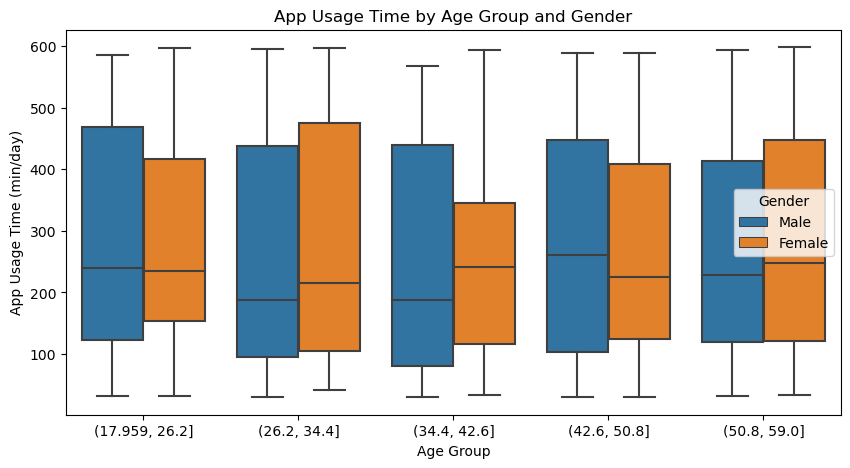

        Age Group  Gender  App Usage Time (min/day)
0  (17.959, 26.2]  Female                276.562500
1  (17.959, 26.2]    Male                285.074074
2    (26.2, 34.4]  Female                276.475000
3    (26.2, 34.4]    Male                247.895522
4    (34.4, 42.6]  Female                254.746032
5    (34.4, 42.6]    Male                256.936508
6    (42.6, 50.8]  Female                275.305085
7    (42.6, 50.8]    Male                280.875000
8    (50.8, 59.0]  Female                275.300000
9    (50.8, 59.0]    Male                275.797753


In [14]:
df['Age Group'] = pd.cut(df['Age'], bins=5)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age Group', y='App Usage Time (min/day)', hue='Gender', data=df)
plt.title('App Usage Time by Age Group and Gender')
plt.show()
#avg the n of data to every group. male still approximately have wider range

avg_app_usage = df.groupby(['Age Group', 'Gender'])['App Usage Time (min/day)'].mean().reset_index()
print(avg_app_usage)
#青壯年，特別是男性，平均使用時間較短，或許因上班族較多?

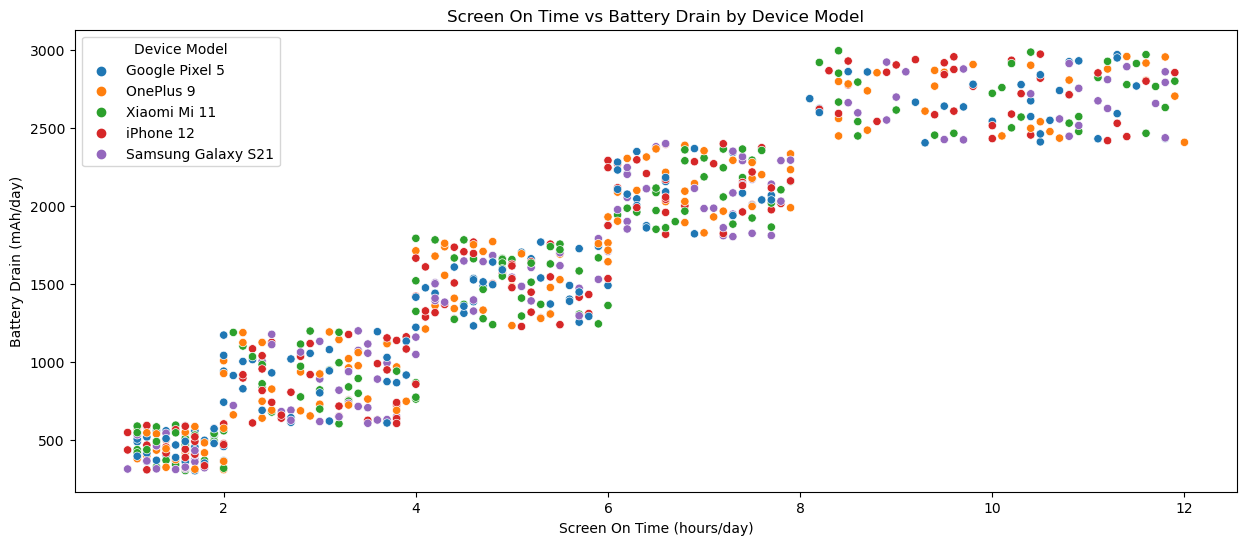

In [ ]:
fig,ax=plt.subplots(2,1, figsize=(10,5))
sns.scatterplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', hue='Device Model', data=df, ax=ax[0])
plt.title('Screen On Time vs Battery Drain by Device Model')
plt.show()
# clearly the more screen on time, the more battery drain
# interesting how groups of data are formed like 5 boxes, either data got selected before or battery % is gonna drop the moment screen time hits 2hr :)
# btw, no obvious difference between phone models & no obvious outlier
# tight grouping in first group, showing phones must have battery drain even when screen is off, and the amount may be decided by how many apps are running in the background or sth like that

## futher check 2

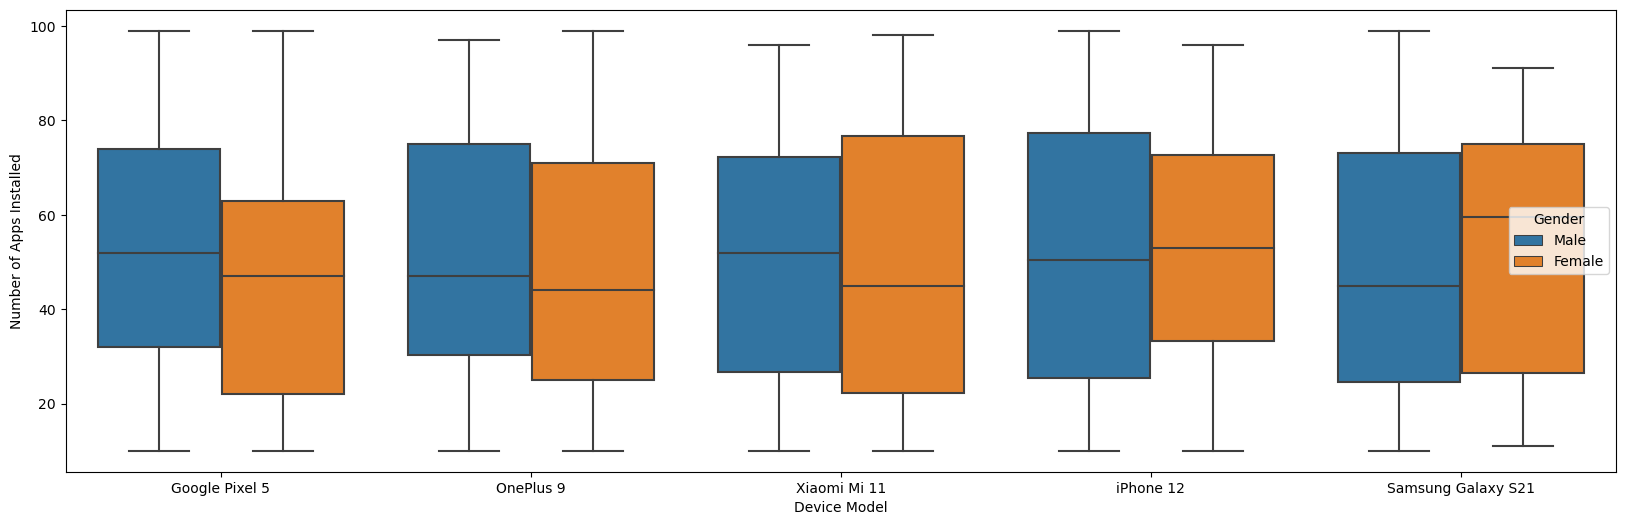

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Device Model', y='Number of Apps Installed', hue='Gender', data=df)
#sns.boxplot(x='Gender', y='Number of Apps Installed', data=df, ax=ax[1])
plt.show()
# Pixel 5 female got less apps installed but not obvious


In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,6))
sns.histplot(data=df, x='Data Usage (MB/day)', hue='Gender', bins=20, kde=True, ax=ax[0])


# Preparation